# گزارش تمرین کامپیوتری سوم هوش مصنوعی
در این تمرین می‌خواهیم با استفاده از قاعده بیز و مدل شبکه بیز، به طبقه‌بندی توضیحات و اسم کتاب‌های داده‌شده بپردازیم. برای این کار، لازم است ابتدا با کمک داده‌های تمرین، مقادیر احتمال شرطی موردنیاز را به دست آورده و پس از رسم نمودار کلمات با بیش‌ترین تکرار، با استفاده از قاعده بیز، احتمال متعلق بودن هر ردیف از داده‌های تست به هر کلاس را به دست آوریم. سپس، کلاسی که بیش‌ترین احتمال توام را نتیجه داده، انتخاب کنیم و پس از مقایسه با کلاس واقعی، در صورت درست بودن حدس خود، به تعداد حدس‌های درست یک واحد اضافه کنیم. دقت نهایی مدل طبقه‌بند ساخته‌شده، حاصل تقسیم تعداد دفعات حدس درست بر تعداد داده‌های تست است. برای شروع، لازم است کتابخانه‌های هضم و فرمت‌ساز عربی را برای کار با زبان فارسی به محیط کار خود وارد کنیم. همچنین، کتابخانه‌های پانداز و پلات را برای کار با داده‌های تمرین و تست نیاز خواهیم داشت

In [1]:
from __future__ import unicode_literals
!pip install https://github.com/sobhe/hazm/archive/master.zip --upgrade
from hazm import *
import pandas as pd
!pip install arabic-reshaper
!pip install python-bidi
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
from math import log10
train = pd.read_csv('books_train.csv')
test = pd.read_csv('books_test.csv')

     \ 1.4MB 5.9MB/s
     |████████████████████████████████| 1.4MB 11.3MB/s 
     |████████████████████████████████| 235kB 30.7MB/s 
  Created wheel for hazm: filename=hazm-0.7.1-cp37-none-any.whl size=318797 sha256=c1ad4c0d1a52903f246678fe353b11850fcfdc6e82e982e2feec56f679a5e2e1
  Stored in directory: /tmp/pip-ephem-wheel-cache-094hdh8g/wheels/32/97/cc/640e3b2f3e7b53c5ae336824a31184e86072b8ded31dc0151e
  Created wheel for nltk: filename=nltk-3.4-cp37-none-any.whl size=1436384 sha256=4899781b7a5c3e689b00e023a8eb17cb0974920ef0ab1a9db39952383f7a2dad
  Stored in directory: /root/.cache/pip/wheels/4b/c8/24/b2343664bcceb7147efeb21c0b23703a05b23fcfeaceaa2a1e
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=154026 sha256=7b340aa474b09526dac19ae78fe598016d1dadc3744d54b1904e657d2094f314
  Stored in directory: /root/.cache/pip/wheels/66/15/54/4510dce8bb958b1cdd2c47425cbd1e1eecc0480ac9bb1fb9ab
Successfully built hazm nltk libwapiti
  Found existing installa

# مشخص کردن دسته‌بندی‌ها
در این بخش، داده‌های تمرین را برای به دست آوردن انواع دسته‌بندی‌ها بررسی می‌کنیم. نتیجه در خروجی سلول زیر قابل مشاهده است

In [2]:
all_words = dict()
iter = 0
for cat in train.categories.unique():
  all_words[cat] = dict()
  iter += 1
for key, value in all_words.items():
  print(key)

جامعه‌شناسی
کلیات اسلام
داستان کودک و نوجوانان
داستان کوتاه
مدیریت و کسب و کار
رمان


# فاز اول: پیش‌پردازش داده
در این بخش، با استفاده از متد نرمالایز موجود در کتابخانه هضم، توضیحات هر ردیف داده تمرین را نرمال کرده و سپس با استفاده از متغیر پانکچوئیشنز، علامت‌های نگارشی موجود در هر جمله را نیز حذف می‌کنیم. همچنین، برای بهینه‌سازی نتیجه طبقه‌بندی، با استفاده از متدهای کتابخانه هضم، ایست‌واژه‌ها را نیز از هر توضیح کتاب حذف می‌کنیم. البته در ادامه خواهیم دید که علاوه بر ایست‌واژه‌ها، در این مسأله خاص، تعدادی واژه دیگر همچون «نویسنده»، «کتاب» و... نیز وجود دارد که می‌توان از میان کلمات به دست آمده از هر توضیح کتاب، حذف کرد. در نتیجه، کلمات به دست آمده برای هر ردیف داده، منحصر به دسته‌بندی آن کتاب خواهد بود. کلمات به دست آمده برای هر دسته کتاب را در یک دیکشنری با نام آل_وردز نوشته و برای هر دسته‌بندی، کلمات مربوط به آن را به همراه فرکانس تکرار هر کلمه، ذخیره می‌کنیم. دقت شود که یکی از کارهایی که می‌توان برای بهبود نتیجه طبقه‌بندی انجام داد، استفاده از متد لمتایزر است که در این مسأله از آن استفاده شده است

<u>سوال ۱: تفاوت استفاده از متدهای «استمر» و «لمتایزر» چیست؟</u>
<br />
دو روش گفته‌شده، هر دو به عنوان روش‌های پرکاربرد برای جایگزین کردن کلمات هر جمله یا پاراگراف با ریشه‌های آن‌ها به شمار می‌روند. با استفاده از روش اول، یعنی متد «استمر»، می‌توان کلمات جمع را مترادف مفرد آن‌ها در نظر گرفت اما برای این کار، بدون هیچ قاعده خاصی، اگر علامت‌های جمع فارسی مانند «ها»، «های»، «ان» و یا «ات» را در پایان یک کلمه مشاهده کنیم، آن‌ها را حذف می‌کنیم. در سوی مقابل، روش دوم، یعنی متد «لمتایزر»، با استفاده از قوانین زبان و بهره‌گیری از فرهنگ فارسی، اقدام به ریشه‌یابی کلمات می‌کند. در این روش، برخلاف روش اول، کلمه «آسان»، به «آس» تبدیل نمی‌شود؛ چراکه این کلمه مفرد است و نیازی نیست که «ان» پایان آن حذف شود. همچنین، فعل‌های گذشته، حال و آینده، با هر شناسه‌ای، به فرمت «بن‌ماضی + # + بن‌مضارع» تبدیل می‌شود که این امر باعث کاهش یافتن محسوس تعداد کلمات می‌شود. البته در ادامه خواهیم دید که بعضی افعال مثل «شدن» و «بودن» بهتر است که در لیست کلمات پرکاربرد قرار گرفته و از ابتدا حذف شوند


In [3]:
normalizer = Normalizer()
punctuations = '''!()-[]{};:'"\,٬٫،<>./?@#$%٪^&*×ـ+=_~.؟؛«»|‌…'''
stops = set(stopwords_list())
# common_words = set(['کتاب', 'میکند', 'میشود', 'داستان', 'نویسنده', 'کار', 'زندگی', 'مجموعه', 'روز', 'نوشته', 'داشت#دار', 'زد#زن', 'گفت#گو', 'میکرد', 'میخوانیم', 'نام', 'جلد', 'کرد#کن', 'سال', 'شد#شو', 'دست', 'سر', 'فصل'])
common_words = set(['کتاب', 'میکند', 'میشود', 'نوشته', 'داشت#دار', 'زد#زن', 'گفت#گو', 'میکرد', 'کرد#کن', 'سال', 'شد#شو'])
lemmatizer = Lemmatizer()
cat_probability = dict()
for i in range(train.shape[0]):
  my_str = normalizer.normalize(train.loc[i]['description'])
  my_cat = train.loc[i]['categories']
  if my_cat not in cat_probability: # keep track of each class count to calculate prior probabilities later
    cat_probability[my_cat] = 1
  else:
    cat_probability[my_cat] += 1
  no_punct = ""
  for char in my_str:
    if char not in punctuations:
      no_punct = no_punct + char
  words = [[lemmatizer.lemmatize(word) for word in word_tokenize(sentence) if word not in stops and len(word) > 1] for sentence in sent_tokenize(no_punct)]
  for j in range(len(words)):
    for k in range(len(words[j])):
      if words[j][k] not in common_words:
        if words[j][k] in all_words[my_cat].keys(): # the word is already in dict
          all_words[my_cat][words[j][k]] += 1
        else: # the word is a new one
          all_words[my_cat][words[j][k]] = 1

#  فاز دوم: فرآیند مسأله
<u>سوال ۶: نمودارهای میله‌ای کلمات پرتکرار هر کلاس</u>
<br />
در این بخش، ترتیب پاسخگویی به سوالات را به این منظور بر هم می‌زنیم که بتوانیم کلمات مشترک میان دسته‌بندی‌ها را که در میان ایست‌واژه‌ها نبوده‌اند یافته و حذف کنیم. برای این کار، دو دسته کلمه درنظر گرفته و مشاهده می‌کنیم که دسته کوچک‌تر به دقت ۸۲.۲ درصد و دسته بزرگ‌تر به دقت ۸۰.۴۴ درصد می‌رسد. این امر نشان‌دهنده این است که حذف بیش‌از حد کلمات نیز می‌تواند باعث افت دقت طبقه‌بند شود. همچنین، نمودارهای خواسته‌شده را رسم کرده و مشاهده می‌کنیم که عملکرد پیش‌پردازش درست بوده و کلمات پرتکرار هر کلاس واقعاً متعلق به آن‌ها هستند

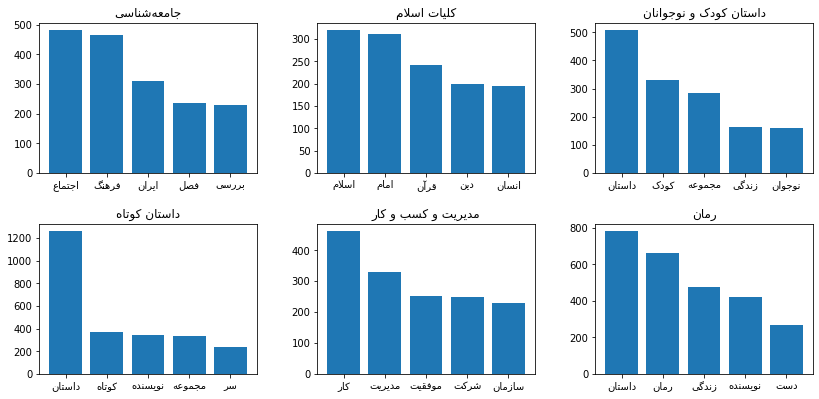

In [4]:
def _(text):
  return get_display(
      arabic_reshaper.reshape(u'%s' % str(text))
  )
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(12, 6)
fig.tight_layout(pad=3.0)
for i in range(2):
  for j in range(3):
    key_index = 3*i + j
    cat = list(all_words.keys())[key_index]
    sorted_words_per_cat = dict(sorted(all_words[cat].items(), key=lambda item: item[1], reverse=True))
    words_per_cat = list(sorted_words_per_cat.keys())[0:5]
    counts_per_cat = list(sorted_words_per_cat.values())[0:5]
    axs[i, j].bar(list(map(lambda x:_(x), words_per_cat)), counts_per_cat)
    axs[i, j].set_title(_(cat))
plt.show()
features_probability = dict()
for cat, words in all_words.items(): # calculate likelihoods per each class
  features_probability[cat] = dict()
  s = sum(words.values())
  for word, count in words.items():
    features_probability[cat][word] = log10(count / s) # log10((count + 1) / (s + N))
for key in cat_probability.keys(): # calculate prior probability per each class
  cat_probability[key] /= train.shape[0]

<u>سوال ۲: مفاهیم خواسته‌شده را تعریف کنید</u>
<br />
1.   Evidence <br />
برای محاسبه احتمالات توام، گاهی ممکن است مقادیر برخی متغیرهای شرطی مشخص باشد. به این مقادیر سرنخ گفته می‌شود. در این مسأله، هدف، یافتن احتمال توام «عضو کلاس الف بودن» به شرط «داشتن کلمه ب» است. بنابراین، به شرط «داشتن کلمه ب» سرنخ می‌گویند. البته خواهیم دید که ما برای طبقه‌بندی هر توضیح کتاب، تعدادی کلمه داریم که به مجموعه آن‌ها سرنخ می‌گوییم
2.   Likelihood <br />
همان طور که گفته شد، برای محاسبه احتمال توام «عضو کلاس الف بودن» به شرط «داشتن کلمه ب» باید از قاعده بیز استفاده کرد. طبق این قاعده، رابطه شکل ۱ برقرار است که در این رابطه، احتمال توام عکس، یعنی احتمال «داشتن کلمه ب» به شرط «عضو کلاس الف بودن»، مشابهت نامیده می‌شود. در این مسأله، «نسبت تعداد تکرار هر کلمه در هر کلاس به تعداد کل کلمات آن کلاس»، برابر با «مشابهت به ازای هر جفت کلاس و کلمه» است. بدیهی است که در صورتی که تعداد سرنخ‌ها بیش از یک عدد باشد، باید به ازای هر کلمه، مشابهت آن با کلاس مدنظر را به دست آورد و در یکدیگر ضرب کرد. هر چند در این مسأله، لگاریتم پایه ۱۰ مشابهت‌ها با یکدیگر جمع خواهد شد
3.   Prior <br />
علت استفاده از قاعده بیز، این است که گاهی نمی‌توان یک احتمال توام را به سادگی حساب کرد ولی می‌توان احتمال توام عکس آن را به نحوی به دست آورد. در این مسأله هم محاسبه احتمال تعلق داشتن یک توضیح با توجه به کلماتش به یک دسته‌بندی، به سادگی قابل محاسبه نیست ولی می‌توان با کمک محاسبه ساده مشابهت‌ها که پیش‌تر گفته شد، احتمال توام مطلوب را به سادگی محاسبه کرد. برای این کار، به احتمال دیگری هم نیاز داریم که «احتمال مقدم» نامیده می‌شود. علت این نامگذاری هم این است که این احتمال را می‌توان با استفاده از نمونه‌برداری آماری محاسبه کرد. مثلاً، در مسأله تشخیص آنفولانزا با علامت سرفه، محاسبه احتمال آنفولانزا داشتن هر شخص از نوع احتمال مقدم است که می‌توان با جمع‌آوری داده‌های بیمارستانی، آن را محاسبه کرد. در این مسأله نیز، «تعداد سطرهای هر کلاس» تقسیم بر «تعداد کل سطرهای داده تمرین» مقدار احتمال مقدم را تعیین می‌کند
4.   Posterior <br />
مفهوم بعدی، «احتمال مؤخر» است. علت نامگذاری این احتمال هم این است که لازم است تا تمام مقدارهای گفته شده در بالا محاسبه شوند تا بتوان این احتمال را محاسبه کرد. در این مسأله، هدف نهایی ما یعنی احتمال توام «عضو کلاس الف بودن» به شرط «داشتن کلمه ب» همان احتمال مؤخر است. البته باید دقت شود که مقدار احتمال‌های به دست آمده چون بر احتمال هر کلمه تقسیم نمی‌شوند، دقیقاً برابر احتمال مؤخر نبوده و تنها ضریبی از آن هستند
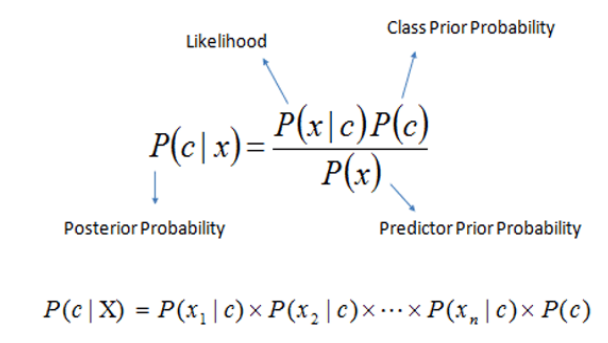
<br />شکل ۱



<u>سوال ۳: استفاده از بایگرام‌ها چه کمکی به بهتر شدن نتیجه طبقه‌بند می‌کند؟</u>
<br />
مزیت استفاده از بایگرام‌ها یا به طور کلی تغییر شیوه توکنایز و جفت‌های ۲ یا چندتایی گرفتن کلمات برای طبقه‌بندی جملات، در دو نمونه قابل بررسی است
<br />
1.    نمونه اول <br />
<i>جمله اول: من عاشق سفر هستم</i> <br />
<i>جمله دوم: من عاشق سفر نیستم</i> <br />
همان طور که مشاهده می‌شود، هر دو جمله کلمه «عاشق» را دارند ولی مفهوم یکی مثبت و دیگری منفی است. بنابراین، بهتر است برای پردازش این جملات، «عاشق سفر هستم» و «عاشق سفر نیستم» را به شکل یک واحد در نظر گرفت. در غیر این صورت، ممکن است که هر دو جمله مفهوم مثبت «عاشق» بودن را برسانند. پس می‌توان گفت که در این مثال، استفاده از بایگرام کافی نیست و باید از ۳-گرام استفاده کرد
2.    نمونه دوم <br />
<i>جمله اول: عدد صفر عضو خنثی جمع مجموعه اعداد حقیقی است</i> <br />
<i>جمله دوم: ماه صفر دومین ماه قمری است</i> <br />
همان طور که مشاهده می‌شود، جملات بالا هر دو دارای کلمه «صفر» هستند ولی معنای آن‌ها کاملاً با یکدیگر متفاوت است. با این حال، اگر دو کلمه متوالی «عدد صفر» یا «ماه صفر» را به جای کلمه منفرد «صفر» در نظر بگیریم، می‌توانیم مطمئن باشیم که حالا ماشین هم توانایی درست خواندن این کلمه را داشته و معنای یکی را از دیگری تمیز می‌دهد


<u>سوال ۴: مشکل احتمال‌های صفر چیست؟</u>
<br />
همان طور که گفته شد، ما باید برای یافتن احتمال توام «عضو کلاس الف بودن» به شرط «داشتن کلمه ب»، میزان شباهت هر کلمه در کلاس الف را به همراه احتمال مقدم این کلاس محاسبه کرده و در یکدیگر ضرب کنیم (یا در این مسأله، مقادیر لگاریتمی آن‌ها را با یکدیگر جمع کنیم). نتیجه این عملیات، ضریبی از احتمال توام هدف خواهد بود که تعیین‌کننده کلاس «توضیح کتاب» داده‌شده است. با این حال، اگر یک کلمه از «توضیح کتاب» داده‌شده، در میان کلمات این کلاس نباشد (حال آن که سایر کلمات آن در این کلاس هستند) مقدار شباهت این کلمه با کلاس موردنظر برابر صفر شده و در نتیجه شباهت سایر کلمات بی‌اهمیت می‌شود. با مشاهده شکل ۱، می‌توان این مفهوم را به صورت ریاضی هم توضیح داد. به این صورت که اگر یکی از شباهت‌ها برابر صفر شود، حاصل عبارت موردنظر صرف‌نظر از سایر مقادیر، برابر صفر می‌شود (در این مسأله، مقدار لگاریتم صفر برابر منفی‌بی‌نهایت بوده و در نتیجه سایر شباهت‌ها هر چه قدر هم که بزرگ باشند، حاصل نهایی منفی‌بی‌نهایت خواهد بود)
<br />
<br />
<u>سوال ۵: مشکل احتمال‌های صفر را چگونه برطرف کنیم؟</u>
<br />
برای رفع مشکل احتمال‌های صفر، باید برای کلماتی که در میان کلمات یک کلاس نیستند، یک مقدار حداقل درنظر گرفت تا اثر سایر مقادیر را از بین نبرند. برای این کار می‌توان کوچک‌ترین مقدار موجود در میان احتمال‌های ویژگی را محاسبه کرد و مقدار آن را در متغیر مین‌اف‌پی قرار داد. در این صورت، هر گاه که می‌بینیم یک کلمه در میان کلمات یک کلاس نیست، به جای میزان شباهت، مقدار مین‌اف‌پی را به آن اختصاص می‌دهیم. روش گفته شده در صورت تمرین نیز مشابه همین روش است. با این تفاوت که مقدار اختصاص داده شده به ازای هر کلمه و هر کلاس، اندکی کوچک‌تر است که در نتیجه نهایی فرق چندانی ندارد. توضیح روش گفته شده را هم در شکل ۲ می‌توان مشاهده کرد که به ازای هر کلمه، یک واحد به صورت و «دی واحد» به مخرج کسر اضافه می‌کنیم. در نتیجه، حاصل این کسر هرگز صفر نخواهد شد. خواهیم دید که استفاده از روش گفته شده، دقت را از ۲۵.۵ درصد به ۸۲.۲ درصد می‌رساند. علت این امر هم این است که شانس زیادی وجود دارد که کلمات داده تست را در داده تمرین ندیده باشیم و در نتیجه اگر بخواهیم به ازای هر کلمه جدید، قدرت سایر کلمات را هم از دست بدهیم، طبقه‌بند ضعیفی خواهیم داشت. دقت شود که به جای استفاده از متغیر مین‌اف‌پی، می‌توان از عددی تجربی (۴.۹-) استفاده کرد که دقت را به ۸۳.۱۱ درصد بهبود می‌دهد
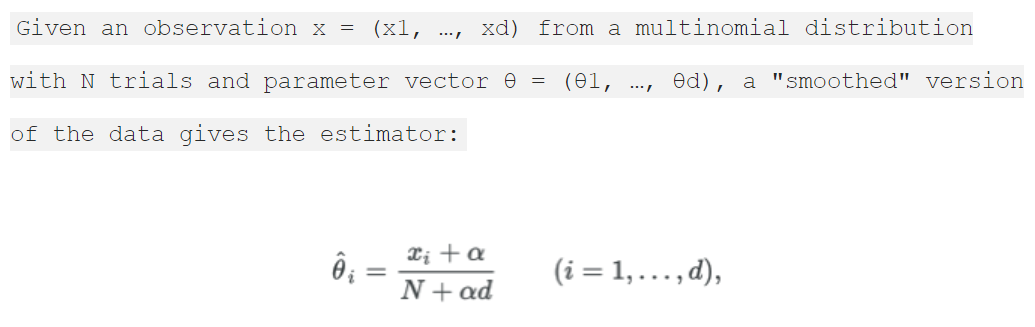
<br />شکل ۲
<br />* در شکل ۲ اگر آلفا را برابر یک گرفته و «دی» را برابر صفر، روش استفاده از متغیر مین‌اف‌پی حاصل می‌شود

# فاز سوم:‌ ارزیابی

In [19]:
min_fp = None
for words in features_probability.values():
  min_fp =  min(words.values()) if ((min_fp is not None) and (min_fp > min(words.values()))) or (min_fp is None) else min_fp
correct = 0
correct_per_class = dict()
wrong_pred = 5
for i in range(test.shape[0]):
  my_str = normalizer.normalize(test.loc[i]['description'])
  my_cat = test.loc[i]['categories']
  no_punct = ""
  for char in my_str:
    if char not in punctuations:
      no_punct = no_punct + char
  words = [[lemmatizer.lemmatize(word) for word in word_tokenize(sentence) if word not in stops and len(word) > 1] for sentence in sent_tokenize(no_punct)]
  results = []
  for cat, fp in features_probability.items():
    total_probability = log10(cat_probability[cat])
    for j in range(len(words)):
      for k in range(len(words[j])):
        if words[j][k] not in common_words:
          if words[j][k] in all_words[cat].keys():
            total_probability += fp[words[j][k]]
          else:
            s = sum(all_words[cat].values())
            total_probability += min_fp # -float('inf') -> 25.55% ~~~ -4.9 -> 83.11%
    results.append((cat, total_probability))
  prediction = sorted(results, key = lambda x: x[1], reverse=True)[0][0]
  if prediction in correct_per_class.keys():
    correct_per_class[prediction]['total'] += 1
  else:
    correct_per_class[prediction] = {'total': 1, 'correct': 0}
  if prediction == my_cat:
    correct += 1
    correct_per_class[prediction]['correct'] += 1
  elif wrong_pred > 0:
    print(test.loc[i])
    print('prediction:', prediction)
    print()
    wrong_pred -= 1

print("Accuracy: ", "{:.2f}".format(correct / test.shape[0] * 100), "%")
F1 = []
print()
for cat, info in correct_per_class.items():
  precision = info['correct'] / info['total'] * 100
  print("Precision (", cat, "): ", "{:.2f}".format(precision), "%")
  recall = info['correct'] / (test.categories == cat).sum() * 100
  print("Recall (", cat, "): ", "{:.2f}".format(recall), "%")
  f1 = 2 * precision * recall / (precision + recall)
  F1.append(f1)
  print("F1 (", cat, "): ", "{:.2f}".format(f1), "%")
  print()
print("Macro F1: ", "{:.2f}".format(sum(F1) / len(F1)), "%")

title                                                      کآشوب
description    «کآشوب (بیست و سه روایت از روضه‌هایی که زندگی ...
categories                                          داستان کوتاه
Name: 0, dtype: object
prediction: کلیات اسلام

title                                             قلعه‌ی حیوانات
description    «قلعه‌ی حیوانات» جورج اورول، درباره گروهی از ح...
categories                                                  رمان
Name: 3, dtype: object
prediction: جامعه‌شناسی

title                                       اسلام و چالش اقتصادی
description    «اسلام و چالش اقتصادی» نوشته محمد عمر چپرا(   ...
categories                                           کلیات اسلام
Name: 5, dtype: object
prediction: جامعه‌شناسی

title                                        زندانی قلعه‌ی قهقهه
description    رمان تاریخی «زندانی قلعه قهقهه» روایت‌گر سرگذش...
categories                                          داستان کوتاه
Name: 12, dtype: object
prediction: رمان

title                             

<u>سوال ۷: چرا مقادیر «صحت» و «پوشش» هر کدام به تنهایی برای ارزیابی مدل کافی نیستند؟</u>
<br />
مشاهده می‌شود که «صحت» کلاس «جامعه‌شناسی» نسبت به «پوشش» آن کم‌تر است. دلیل این امر این است که این طبقه‌بند، تعداد زیادی از کتاب‌های داده تست را در طبقه «جامعه‌شناسی»‌ قرار داده، در حالی که مربوط به آن نبوده‌اند (پس صحت کاهش می‌یابد). با این حال، تعداد زیادی از کتاب‌هایی را که مربوط به این طبقه بوده‌اند، در همین طبقه قرار داده است (پس پوشش افزایش می‌یابد). در واقع می‌توان گفت که این طبقه‌بند نسبت به کلاس گفته‌شده دارای مقداری بایاس است. این موضوع باعث کاهش دقت طبقه‌بند شده‌است. در مقابل، چون کلمات توضیحات هر «رمان» را می‌توان در میان کلمات توضیحات هر کتابی یافت، تعدادی از «رمان‌ها» را به اشتباه در کلاس دیگری قرار داده و این موضوع باعث کاهش پوشش این کلاس شده است. در سوی مقابل، از میان کتاب‌هایی که در این کلاس قرار داده، تعداد قابل قبولی «رمان» بوده‌اند. بنابراین صحت طبقه‌بندی این کلاس بالاتر است. پس می‌توان گفت که مقادیر صحت و پوشش هر کلاس  به تنهایی برای ارزیابی مدل کافی نیستند و هر کدام بخشی از عملکرد مدل را نشان می‌دهند
<br />
<br />
<u>سوال ۸: اف-۱ چه نوع میانگین‌گیری را روی مقادیر صحت و پوشش اجرا می‌کند و اهمیت آن چیست؟</u>
<br />
میانگین هم‌ساز یا هارمونیک که از رابطه شکل ۳ محاسبه می‌شود، معمولاً هنگامی کاربرد دارد که محاسبه میانگین نرخ‌ها اهمیت داشته باشد. در موارد خاص که فقط دو عدد وجود دارد، میانگین هارمونیک را می‌توان از رابطه معیار اف-۱ به دست آورد. می‌توان ثابت کرد که میانگین هم‌ساز همواره کوچک‌تر یا مساوی میانگین حسابی است. همچنین، از این میانگین تنها برای اعداد مثبت استفاده می‌شود. اهمیت استفاده از این روش میانگین‌گیری را می‌توان در یک مثال بررسی کرد:
فرض کنید که برای یک کلاس، صحت حدود ۱۰۰ درصد و پوشش حدود صفر به دست بیاید. یعنی طبقه‌بند تعداد کمی از کتاب‌ها را در کلاس موردنظر قرار داده، با این حال همان‌هایی را هم که قرار داده، درست بوده‌اند. مشاهده می‌شود که میانگین حسابی مقادیر صحت و پوشش حدود ۵۰ درصد به دست می‌آید، در حالی که معیار اف-۱ این میانگین را حدود صفر نشان می‌دهد! بنابراین، اگر با میانگین حسابی عملکرد طبقه‌بند را ارزیابی می‌کردیم، به اشتباه می‌افتادیم. به طور کلی می‌توان گفت که میانگین هم‌ساز، مقادیر بیش از حد را در نظر نگرفته و یک خروجی متعادل می‌دهد
<br />
<br />
<u>سوال ۹: سه حالت میانگین‌گیری زیر را توضیح دهید</u>
<br />
*   Macro <br />
میانگین حسابی مقادیر اف-۱ کلاس‌ها <br />
البته در یک حالت دیگر می‌توان ابتدا میانگین حسابی صحت کلاس‌ها و میانگین حسابی پوشش کلاس‌ها را به دست آورد و سپس از این دو مقدار میانگین هم‌ساز گرفت
*   Micro <br />
برابر با همان دقت است یعنی تعداد طبقه‌بندی‌های درست تقسیم بر تعداد کل نمونه‌ها
*   Weighted <br />
میانگین وزن‌دار مقادیر اف-۱ کلاس‌ها که در آن وزن هر مقدار را می‌توان نسبت تعداد نمونه‌های آن کلاس به تعداد کل نمونه‌ها در نظر گرفت
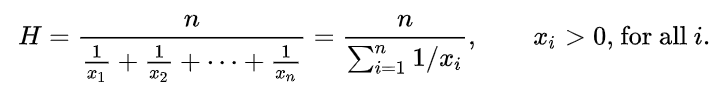
<br />شکل ۳




<u>سوال ۱۰: معیارهای دقت و ماکرو اف-۱ را برای دو حالت «با استفاده از راه‌حل سوال ۵» و «بدون استفاده از آن» گزارش کنید</u>
<br />
*   Accuracy <br />
a) Using Additive Smoothing: 82.22 % <br />
b) Without Additive Smoothing: 25.55 % <br />

*   Macro F1 <br />
a) Using Additive Smoothing: 82.19 % <br />
b) Without Additive Smoothing: nan % (مقادیر صحت و پوشش کلاس «رمان» برابر صفر به دست آمد) <br />

<u>سوال ۱۱: مقادیر به دست آمده در سوال ۱۰ را تحلیل کنید</u>
<br />
مشاهده می‌شود که در صورتی که از روش گفته شده برای حل مشکل احتمال‌های صفر استفاده نشود، دقت به ۲۵.۵ درصد کاهش یافته و مقدار ماکرو اف-۱ هم غیرقابل محاسبه می‌شود. بنابراین، استفاده از روش گفته شده برای حل مشکل احتمال‌های صفر اجباری به نظر می‌رسد. زیرا در غیر این صورت، طبقه‌بند عملکرد درستی نخواهد داشت. جزئیات علت این امر هم در بخش‌های پیشین آورده شده است
<br />
<br />
<u>سوال ۱۲: چه بخش‌هایی از راه‌حلی که پیش گرفتیم باعث شد تا برخی کتاب‌ها درست طبقه‌بندی نشوند؟</u>
<br />
در خروجی سلول آخر می‌توان مشاهده کرد که ۵ عنوان کتاب به اشتباه طبقه‌بندی شده‌اند. درباره هر یک می‌توان علت اشتباه طبقه‌بند را حدس زد
*   <i>کآشوب</i> <br />
این کتاب که یک «داستان کوتاه» است، در کلاس «کلیات اسلام» قرار گرفته است. علت این موضوع را می‌توان در چند کلمه ابتدای توضیح آن یافت. در این توضیح، کلماتی مانند «روایت» و «روضه» آمده که مفهومی دینی را می‌رساند؛ همچنین، موضوع این داستان کوتاه هم «واقعه عاشورا» ست و انتظار هم می‌رفت که مدل برای تعیین کلاس آن به اشتباه بیفتد 
*   <i>قلعه حیوانات</i> <br />
کتاب بعدی یکی از مشهورترین کتاب‌های علوم سیاسی و اجتماعی است که در آن، نویسنده با بهره‌گیری از نمادها، انقلاب کارگری بر ضد نظام سرمایه‌داری را به تصویر می‌کشد. همان طور که مشخص است، علت اشتباه مدل در این مورد هم این است که این کتاب با آن که یک «رمان» است ولی در عین حال، می‌تواند در کلاس کتاب‌های «جامعه‌شناسی» هم قرار گیرد



علت‌های گفته شده را می‌توان برای توجیه عملکرد اشتباه مدل ساخته شده برای سایر کتاب‌ها هم ارائه کرد. بنابراین، می‌توان گفت که این مدل با توجه به این که تنها از کلمات تفکیک شده هر کتاب برای طبقه‌بندی آن استفاده می‌کند، در بعضی موارد که کتاب‌ها پتانسیل قرارگیری در دو کلاس را دارند، به اشتباه می‌افتد. برای رفع این مشکل، می‌توان در مواردی که احتمال متعلق بودن یک کتاب به دو کلاس به یکدیگر نزدیک است، آن را در یک کلاس جدید که ترکیب دو کلاس ارائه شده است قرار داد